In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta
from matplotlib.colors import LinearSegmentedColormap

In [46]:
pd.options.mode.chained_assignment = None

In [47]:
TICKER = "PL=F"
df = yf.download(TICKER,'2023-02-01',str(date.today()))

[*********************100%%**********************]  1 of 1 completed


In [48]:
def expandOpenClose(df):
    
    old_size = df.shape[0]
    new_size = 2*old_size
    
    new_df = pd.DataFrame({'Date':[None] * new_size, 'Price': [0.00] * new_size})
    
    for i in range(0, old_size):
        ## new_df[2 * i] = df[i]
        new_df['Date'][2 * i] = str(df.index[i]).split()[0] + " open"
        new_df['Price'][2 * i] = float(df['Open'][i])
        
    for i in range(1, old_size+1):
        ## new_df[2 * i - 1] = df[i-1]
        new_df['Date'][2 * i - 1] = str(df.index[i-1]).split()[0] + " close"
        new_df['Price'][2 * i - 1] = float(df['Adj Close'][i-1])
        
        
    return new_df

In [49]:
new_df = expandOpenClose(df)

In [50]:
def ema(df, days, smoothing=2):
    
    col = 'Ema-{}'.format(days)
    df[col] = 0

    for i in range(days): 
        df[col] = df['Price'].iloc[0:days].sum()/days

    window = df.shape[0]
    weight = smoothing / (1 + days)

    
    for i in range(days, window):
        ## print(df.index[i])
        
        ## ema today = value_today * weight + value_yesterday * (1 - weight)
        df[col].iloc[i] = (df['Price'].iloc[i] * weight) + (df[col].iloc[i - 1] * (1 - weight))
        

    return df

In [51]:
def findIntersection(df, days1, days2):
    
    intersections = []
    
    col1 = 'Ema-{}'.format(days1)
    col2 = 'Ema-{}'.format(days2)
    
    ## assume that days1 is a shorter interval than days2
    
    bull  = df[col1][0] >= df[col2][0] ## True for yellow above blue
    
    for i in range(df.shape[0]):
        if bull == True and df[col1][i] < df[col2][i]: ## blue above yellow
            bull = False
            ## print("Intersection: ({:4s}, {:05.2f},  {})".format(str(i), df[col1][i], False))
            intersections.append((i, df[col1][i], False))
        elif bull == False and df[col1][i] >= df[col2][i]: ## yellow above blue
            bull = True
            ## print("Intersection: ({:4s}, {:05.2f}, {})".format(str(i), df[col1][i], True))
            intersections.append((i, df[col1][i], True))

    
    return intersections

In [52]:
def printEmaIntersections(df, days1, days2):
    
    df = ema(df, days1)
    df = ema(df, days2)
    
    line_colors = ["black", "yellow", "blue"]
    
    intersections = findIntersection(df, days1, days2)
    
    x = [point[0] for point in intersections]
    y = [point[1] for point in intersections]
    c = [point[2] for point in intersections]
    
    
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # Define your own binary colormap
    colors = [(255, 0, 0), (0, 255, 0)]  # Red (for bear) and Green (for bull)
    custom_cmap = LinearSegmentedColormap.from_list("custom_binary_cmap", colors, N=256)
    
    plt.scatter(x, y, c=c, cmap=custom_cmap, s=100, zorder=10)
    
    ax.plot(df.index, df[['Price']], color='black')
    ax.plot(df.index, df[['Ema-{}'.format(days1)]], color='yellow')
    ax.plot(df.index, df[['Ema-{}'.format(days2)]], color='blue')
    
    plt.show()
    
    fig2, ax2 = plt.subplots(figsize=(9, 6))
    plt.scatter(x, y, c=c, cmap=custom_cmap, s=100, zorder=10)
    plt.plot(x, y)
    
    return intersections

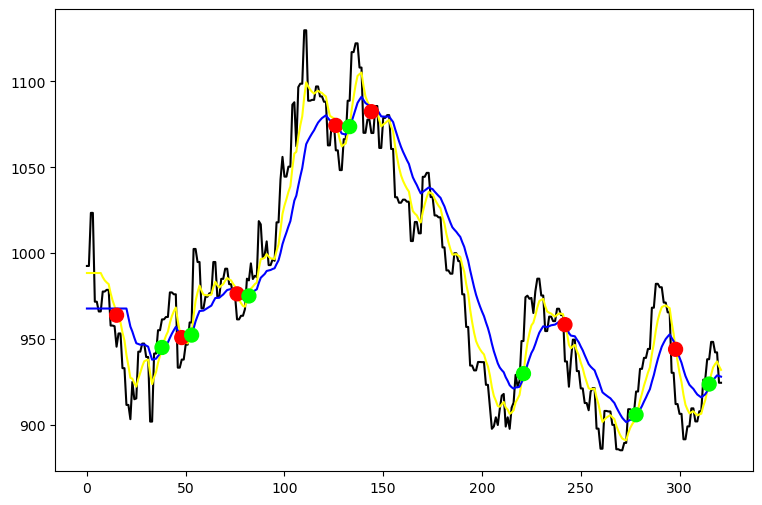

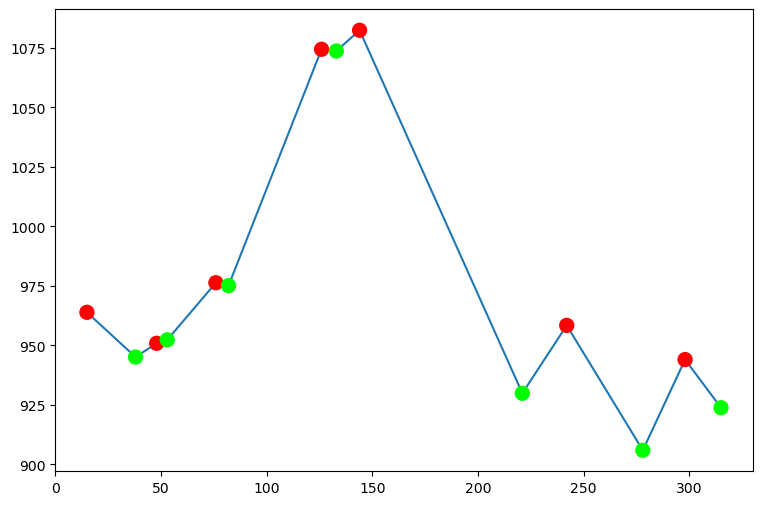

In [53]:
intersections = printEmaIntersections(new_df, 8, 21)

In [54]:
total = 0
for i in intersections:
    if i[2] == False:
        total += i[1]
    else: 
        total -= i[1]
        
print(total)

244.5191235034805


[*********************100%%**********************]  1 of 1 completed


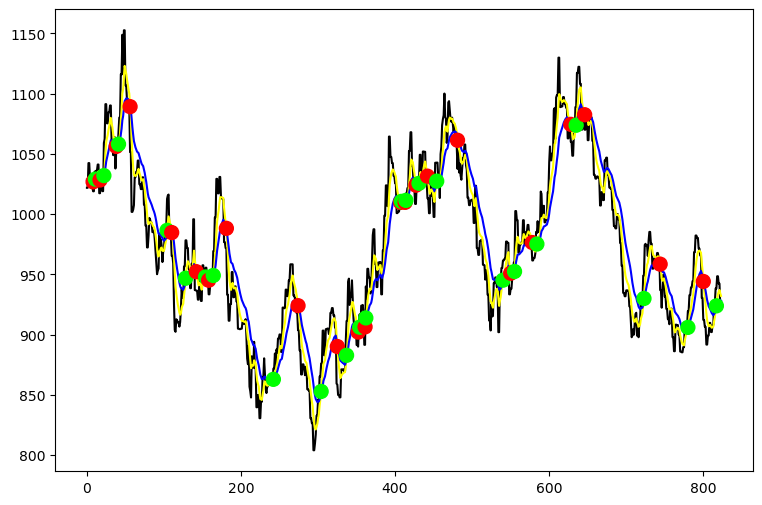

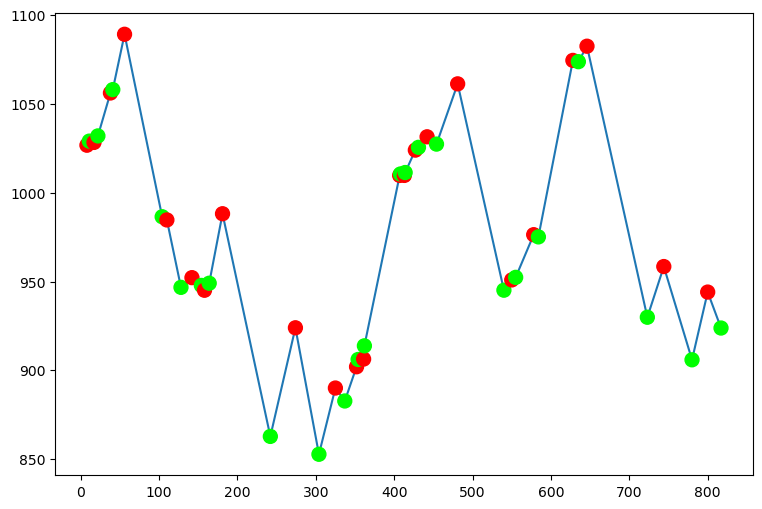

In [57]:
df = yf.download(TICKER,'2022-02-01',str(date.today()))
new_df = expandOpenClose(df)
intersections = printEmaIntersections(new_df, 8, 21)

In [58]:
total = 0
for i in intersections:
    if i[2] == False:
        total += i[1]
    else: 
        total -= i[1]
        
print(total)

667.2976088143165


[*********************100%%**********************]  1 of 1 completed


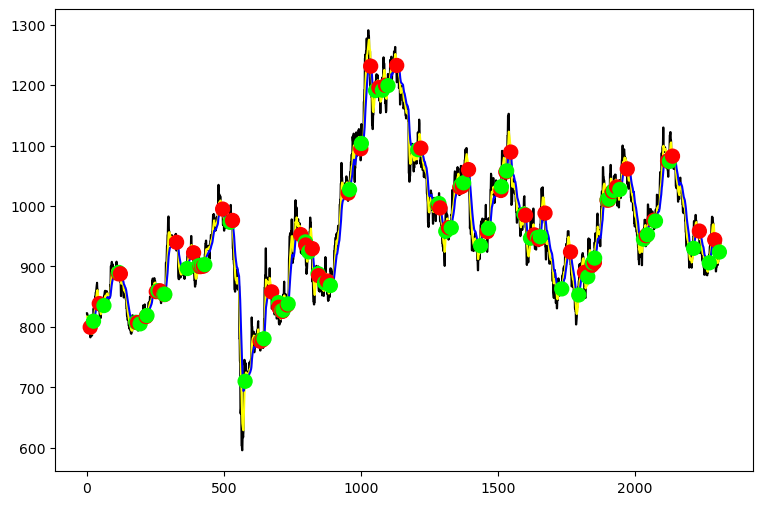

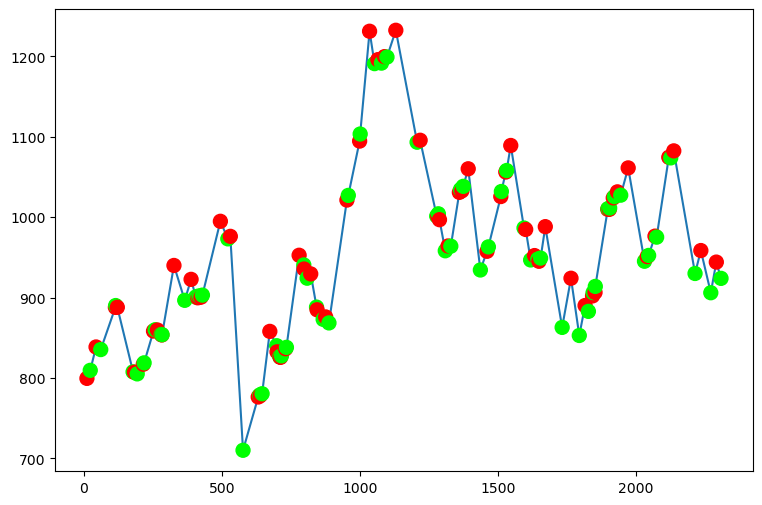

In [62]:
df = yf.download(TICKER,'2019-02-01',str(date.today()))
new_df = expandOpenClose(df)
intersections = printEmaIntersections(new_df, 8, 21)

In [63]:
total = 0
for i in intersections:
    if i[2] == False:
        total += i[1]
    else: 
        total -= i[1]
        
print(total)

1599.5617167568644
